<a href="https://colab.research.google.com/github/ZvoneST/pytorch-labs/blob/master/hw1_lovro.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Classifying Fashion-MNIST

Now it's your turn to build and train a neural network. You'll be using the [Fashion-MNIST dataset](https://github.com/zalandoresearch/fashion-mnist), a drop-in replacement for the MNIST dataset. MNIST is actually quite trivial with neural networks where you can easily achieve better than 97% accuracy. Fashion-MNIST is a set of 28x28 greyscale images of clothes. It's more complex than MNIST, so it's a better representation of the actual performance of your network, and a better representation of datasets you'll use in the real world.

<img src='https://github.com/udacity/deep-learning-v2-pytorch/blob/master/intro-to-pytorch/assets/fashion-mnist-sprite.png?raw=1' width=500px>

In this notebook, you'll build your own neural network. For the most part, you could just copy and paste the code from Part 3, but you wouldn't be learning. It's important for you to write the code yourself and get it to work. Feel free to consult the previous notebooks though as you work through this.

First off, let's load the dataset through torchvision.

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

import torch
from torchvision import datasets, transforms

# Define a transform to normalize the data
transform = transforms.Compose([transforms.ToTensor(),
                                transforms.Normalize((0.5,), (0.5,))])
# Download and load the training data
trainset = datasets.FashionMNIST('~/.pytorch/F_MNIST_data/', download=True, train=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=True)

# Download and load the test data
testset = datasets.FashionMNIST('~/.pytorch/F_MNIST_data/', download=True, train=False, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=64, shuffle=True)

Here we can see one of the images.

In [ ]:
def imshow(image, ax=None, title=None, normalize=True):
    """Imshow for Tensor."""
    if ax is None:
        fig, ax = plt.subplots()
    image = image.numpy().transpose((1, 2, 0))

    if normalize:
        mean = np.array([0.485, 0.456, 0.406])
        std = np.array([0.229, 0.224, 0.225])
        image = std * image + mean
        image = np.clip(image, 0, 1)

    ax.imshow(image)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['left'].set_visible(False)
    ax.spines['bottom'].set_visible(False)
    ax.tick_params(axis='both', length=0)
    ax.set_xticklabels('')
    ax.set_yticklabels('')

    return ax

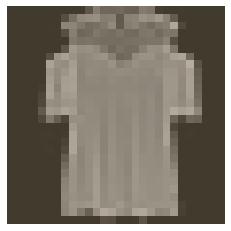

In [ ]:
image, label = next(iter(trainloader))
imshow(image[0,:]);

## Building the network

Here you should define your network. As with MNIST, each image is 28x28 which is a total of 784 pixels, and there are 10 classes. You should include at least one hidden layer. We suggest you use ReLU activations for the layers and to return the logits or log-softmax from the forward pass. It's up to you how many layers you add and the size of those layers.

In [ ]:
from torch import nn, optim
import torch.nn.functional as F

In [ ]:
# TODO: Define your network architecture here
# You should create a Convolutional Neural Network
# (you can also add some fully connected layers if you wish)
class Classifier(nn.Module):
        def __init__(self):
          super(Classifier, self).__init__()
          self.conv1 = nn.Conv2d(1, 10, kernel_size=5)
          self.conv2 = nn.Conv2d(10, 20, kernel_size=5)
          self.conv3 = nn.Conv2d(20, 20, kernel_size=3)
          self.mp = nn.MaxPool2d(2)
          self.fc = nn.Linear(320, 10)
        
        def forward(self, x):
          in_size = x.size(0)
          x = F.relu(self.conv1(x))
          x = F.relu(self.mp(self.conv2(x)))
          x = F.relu(self.mp(self.conv3(x)))
          x = x.view(in_size, -1)  # flatten the tensor
          x = self.fc(x)
          return F.log_softmax(x)

# Train the network

Now you should create your network and train it. First you'll want to define [the criterion](http://pytorch.org/docs/master/nn.html#loss-functions) (something like `nn.CrossEntropyLoss` or `nn.NLLLoss`) and [the optimizer](http://pytorch.org/docs/master/optim.html) (typically `optim.SGD` or `optim.Adam`).

Then write the training code. Remember the training pass is a fairly straightforward process:

* Make a forward pass through the network to get the logits 
* Use the logits to calculate the loss
* Perform a backward pass through the network with `loss.backward()` to calculate the gradients
* Take a step with the optimizer to update the weights

By adjusting the hyperparameters (hidden units, learning rate, etc), you should be able to get the training loss below 0.4.

In [ ]:
# TODO: Create the network, define the criterion and optimizer
model = Classifier()
criterion = nn.NLLLoss()
optimizer = optim.Adam(model.parameters(), lr = 0.002)
n_epochs = 3


In [ ]:
# TODO: Train the network here
for epoch in range(n_epochs):
    for imgs, labels in trainloader:
        optimizer.zero_grad()

        batch_size = imgs.shape[0]
        output = model(imgs)

        loss = criterion(output, labels)

        loss.backward()

        optimizer.step()
    print("Epoch: %d, Loss: %f" % (epoch, float(loss)))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:20: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.


Epoch: 0, Loss: 0.581318
Epoch: 1, Loss: 0.348403
Epoch: 2, Loss: 0.200102


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:20: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.


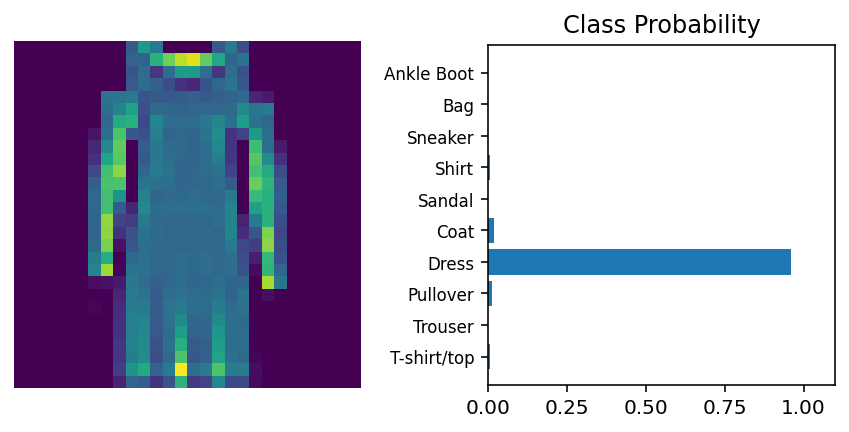

In [ ]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

def view_classify(img, ps, version="MNIST"):
    ''' Function for viewing an image and it's predicted classes.
    '''
    ps = ps.data.numpy().squeeze()

    fig, (ax1, ax2) = plt.subplots(figsize=(6,9), ncols=2)
    ax1.imshow(img.resize_(1, 28, 28).numpy().squeeze())
    ax1.axis('off')
    ax2.barh(np.arange(10), ps)
    ax2.set_aspect(0.1)
    ax2.set_yticks(np.arange(10))
    if version == "MNIST":
        ax2.set_yticklabels(np.arange(10))
    elif version == "Fashion":
        ax2.set_yticklabels(['T-shirt/top',
                            'Trouser',
                            'Pullover',
                            'Dress',
                            'Coat',
                            'Sandal',
                            'Shirt',
                            'Sneaker',
                            'Bag',
                            'Ankle Boot'], size='small');
    ax2.set_title('Class Probability')
    ax2.set_xlim(0, 1.1)

    plt.tight_layout()

# Test out your network!

dataiter = iter(testloader)
images, labels = dataiter.next()
img = images[1]
img = img.unsqueeze(1)

# TODO: Calculate the class probabilities (softmax) for img
prob = model(img)
prob = torch.exp(model(img))

# Plot the image and probabilities
view_classify(img, prob, version='Fashion')

# Ex2
As you can see the neural network with a high 99% recognizes digits. Try the network using the Gradio library. Draw a few digits and see the results. If you get unexpected results, write down possible reasons why the network did not recognize the digits you wrote.

In [ ]:
!pip install gradio

     |████████████████████████████████| 2.9 MB 5.6 MB/s 
     |████████████████████████████████| 84 kB 1.3 MB/s 
     |████████████████████████████████| 255 kB 32.9 MB/s 
     |████████████████████████████████| 53 kB 237 kB/s 
     |████████████████████████████████| 1.1 MB 34.7 MB/s 
     |████████████████████████████████| 2.0 MB 36.9 MB/s 
     |████████████████████████████████| 211 kB 48.2 MB/s 
     |████████████████████████████████| 54 kB 2.9 MB/s 
     |████████████████████████████████| 144 kB 40.2 MB/s 
     |████████████████████████████████| 94 kB 2.7 MB/s 
     |████████████████████████████████| 271 kB 42.5 MB/s 
     |████████████████████████████████| 58 kB 5.8 MB/s 
     |████████████████████████████████| 10.9 MB 35.5 MB/s 
     |████████████████████████████████| 79 kB 7.7 MB/s 
     |████████████████████████████████| 43 kB 1.7 MB/s 
     |████████████████████████████████| 3.6 MB 29.9 MB/s 
     |████████████████████████████████| 61 kB 350 kB/s 
     |████████████████████████

In [ ]:
import tensorflow as tf
import gradio as gr
from matplotlib import pyplot as plt
import numpy as np
objects =  tf.keras.datasets.mnist
(training_images, training_labels), (test_images, test_labels) = objects.load_data()
training_images  = training_images / 255.0
test_images = test_images / 255.0
from tensorflow.keras.layers import Flatten, Dense
model = tf.keras.models.Sequential([Flatten(input_shape=(28,28)), 
                                    Dense(256, activation='relu'),
                                    Dense(256, activation='relu'),
                                    Dense(128, activation='relu'), 
                                    Dense(10, activation=tf.nn.softmax)])

model.compile(optimizer = 'adam',
              loss = 'sparse_categorical_crossentropy',
              metrics=['accuracy'])
model.fit(training_images, training_labels, epochs=10)

def predict_image(img):
  img_3d=img.reshape(-1,28,28)
  im_resize=img_3d/255.0
  prediction=model.predict(im_resize)
  pred=np.argmax(prediction)
  return pred
iface = gr.Interface(predict_image, inputs="sketchpad", outputs="label")



11501568/11490434 [==============================] - 0s 0us/step
Epoch 1/10
1875/1875 [==============================] - 12s 5ms/step - loss: 0.2024 - accuracy: 0.9383
Epoch 2/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0942 - accuracy: 0.9715
Epoch 3/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0647 - accuracy: 0.9799
Epoch 4/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0495 - accuracy: 0.9848
Epoch 5/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0421 - accuracy: 0.9865
Epoch 6/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0351 - accuracy: 0.9890
Epoch 7/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0288 - accuracy: 0.9910
Epoch 8/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0273 - accuracy: 0.9915
Epoch 9/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0227 - accuracy: 0.9930
Epoch 10/10
1875

In [ ]:
iface.launch(debug='True')

Colab notebook detected. This cell will run indefinitely so that you can see errors and logs. To turn off, set debug=False in launch().
Running on public URL: https://45827.gradio.app

This share link expires in 72 hours. For free permanent hosting, check out Spaces (https://huggingface.co/spaces)


This problem is actually a display of one issue on the famous stackoverflow website:
https://stackoverflow.com/questions/58631088/why-are-my-neural-network-predictions-correct-when-applied-to-mnist-hand-drawn-i

As I said before the main problem is **overfitting**. <br>
Overfitting the model generally takes the form of making an overly complex model to explain idiosyncrasies in the data under study. In reality, the data often studied has some degree of error or random noise within it. Thus, attempting to make the model conform too closely to slightly inaccurate data can infect the model with substantial errors and reduce its predictive power.
